In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import xgboost as xgb
from xgboost import XGBClassifier
#from sklearn.metrics import f1_score
#load csv file:
data=pd.read_csv(r'healthcare-dataset-stroke-data.csv')
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
#To know the data type variables present in the dataset.
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(5110, 12)

In [3]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

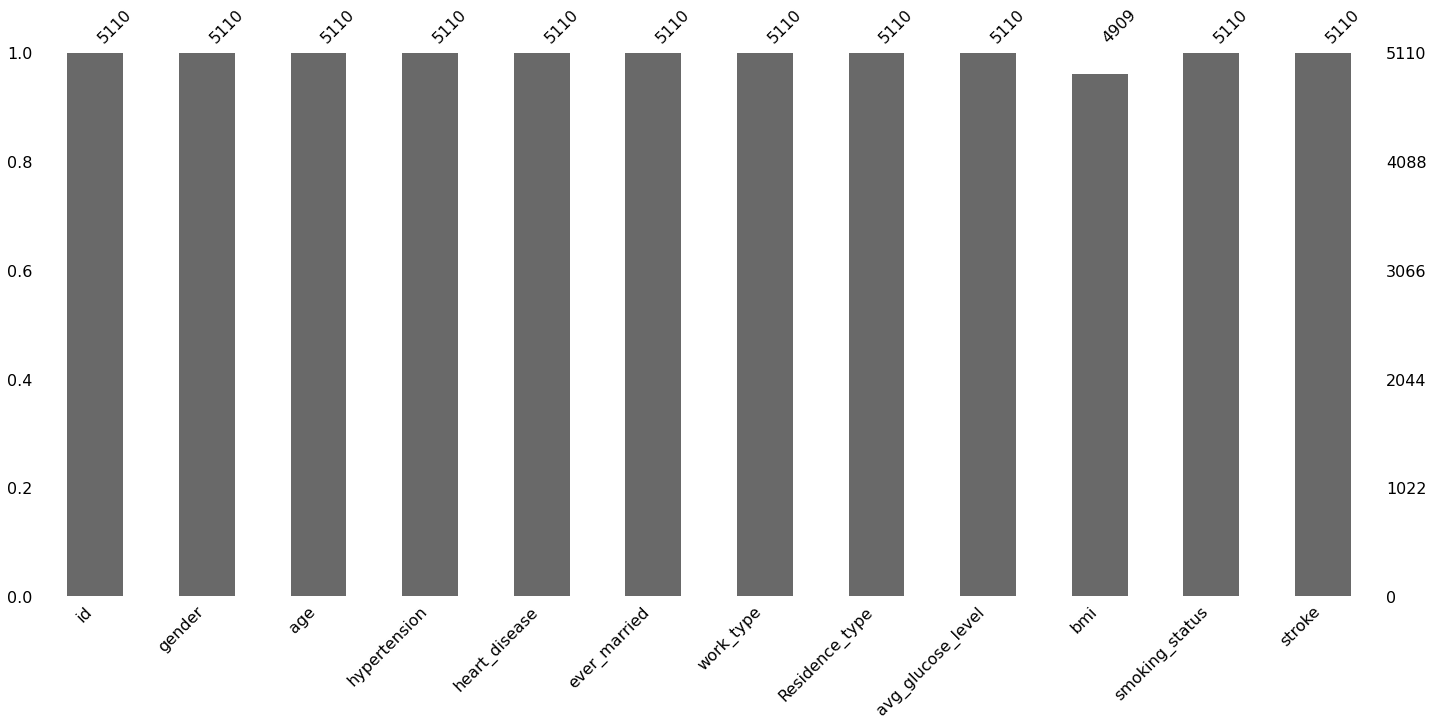

In [4]:
import missingno as msno
msno.bar(data)
plt.show()

In [5]:
#We need to check for null/missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#We can fill up the missing values by finding BMI mean

mean = data['bmi'].mean()
mean

28.893236911794673

In [7]:
data.bmi=(data.bmi.fillna(28.74))

In [8]:
#recheck if there is null values again
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.887209,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698075,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:xlabel='work_type', ylabel='count'>

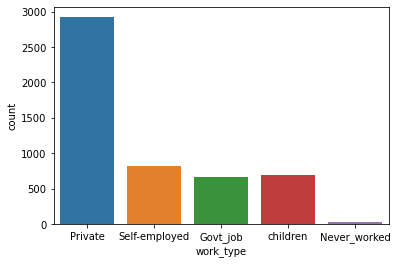

In [10]:
#Countplot to see the worktype distribution
sns.countplot(data['work_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

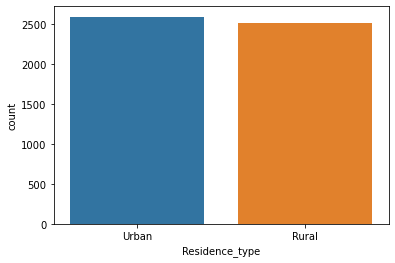

In [11]:
#Residence type
sns.countplot(data['Residence_type'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

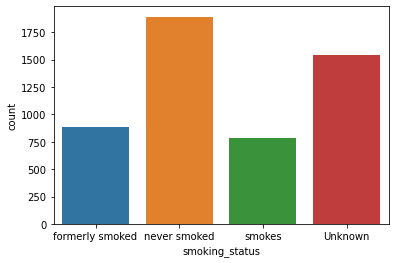

In [12]:
#smoking status
sns.countplot(data['smoking_status'])

<AxesSubplot:xlabel='stroke', ylabel='count'>

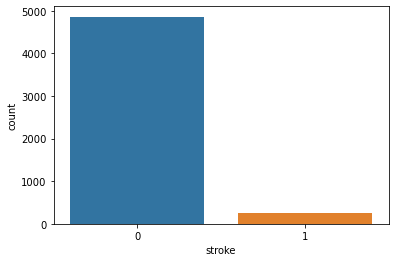

In [13]:
sns.countplot(data['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

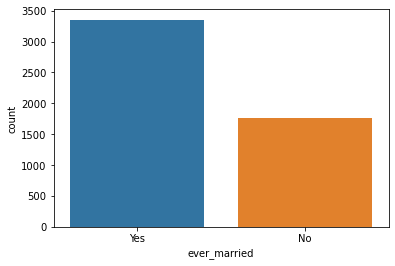

In [14]:
sns.countplot(data['ever_married'])

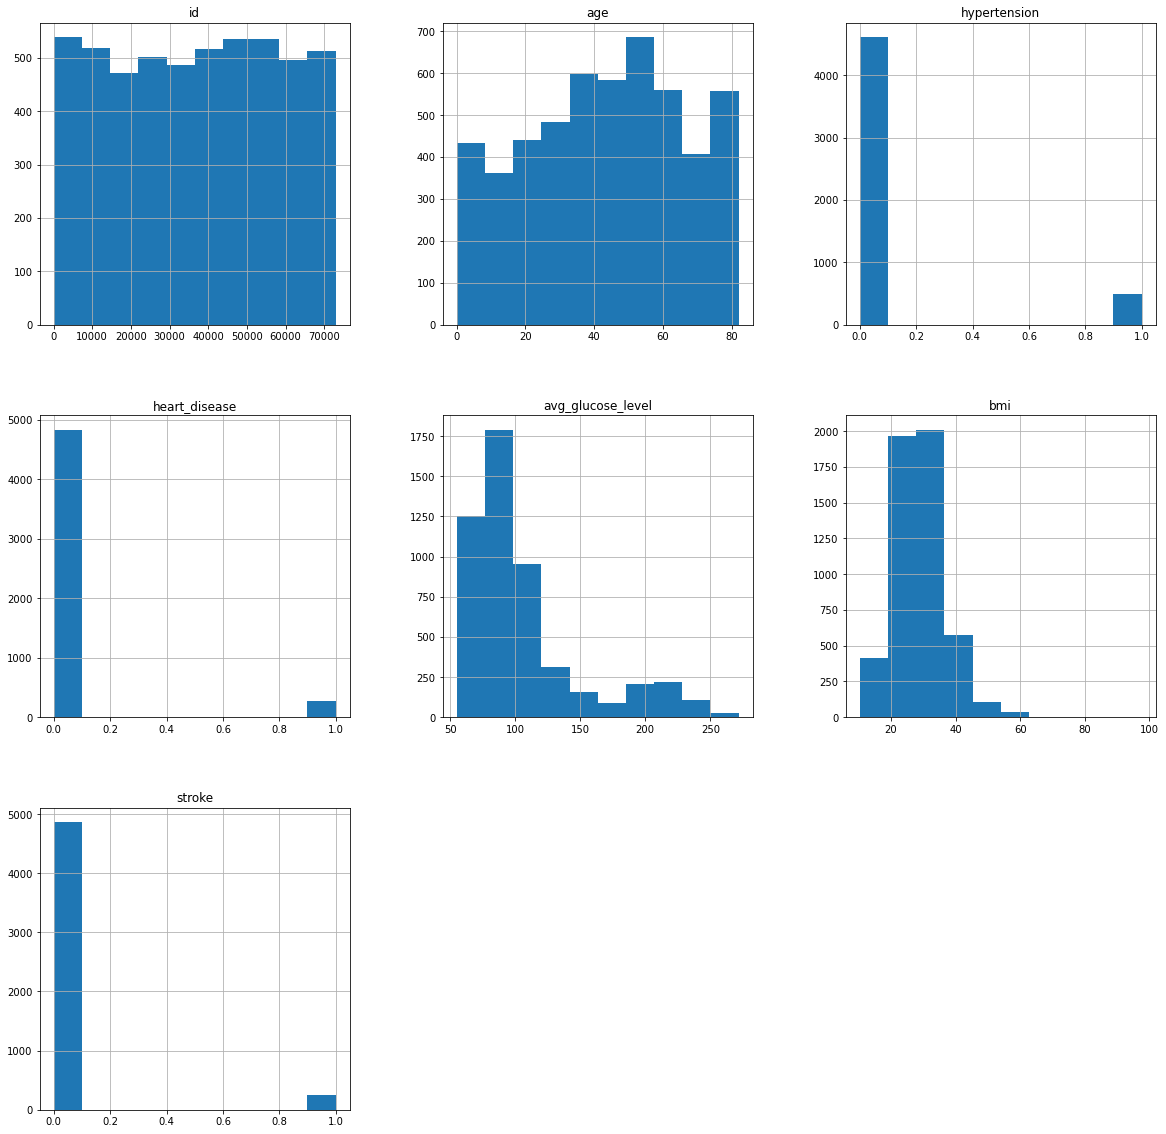

In [15]:
# Plot histograms of each parameter

data.hist(figsize = (20, 20))
plt.show()

In [16]:
min_avg_glucose_level = min(data.avg_glucose_level)
max_avg_glucose_level = max(data.avg_glucose_level)
print(min_avg_glucose_level)
print(max_avg_glucose_level)

55.12
271.74


<AxesSubplot:xlabel='bmi', ylabel='Density'>

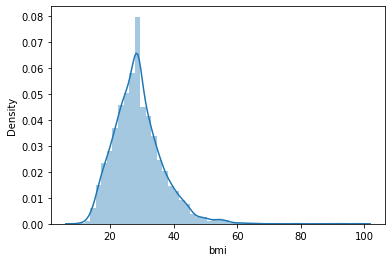

In [17]:
sns.distplot(data['bmi'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

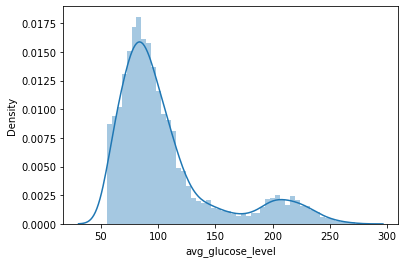

In [18]:
sns.distplot(data['avg_glucose_level'])

<AxesSubplot:xlabel='stroke', ylabel='age'>

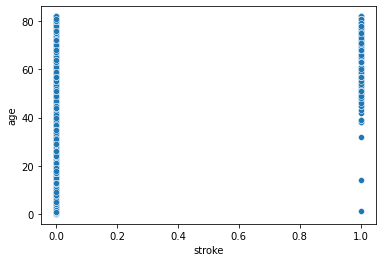

In [19]:
sns.scatterplot(x=data['stroke'],y=data['age'])


<AxesSubplot:xlabel='age', ylabel='Density'>

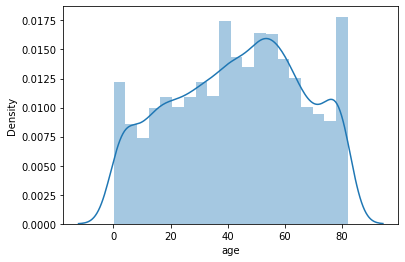

In [20]:
sns.distplot(data['age'])

In [21]:
#We need to map the categorical variables to numerical
data['work_type'] = data['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data['Residence_type'] = data['Residence_type'].map({'Urban':0, 'Rural':1})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
data['ever_married'] = data['ever_married'].map({'Yes':0, 'No':1})

In [22]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,0,0,0,228.69,36.60,0,1
1,51676,1.0,61.0,0,0,0,1,1,202.21,28.74,1,1
2,31112,0.0,80.0,0,1,0,0,1,105.92,32.50,1,1
3,60182,1.0,49.0,0,0,0,0,0,171.23,34.40,2,1
4,1665,1.0,79.0,1,0,0,1,1,174.12,24.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,0,0,0,83.75,28.74,1,0
5106,44873,1.0,81.0,0,0,0,1,0,125.20,40.00,1,0
5107,19723,1.0,35.0,0,0,0,1,1,82.99,30.60,1,0
5108,37544,0.0,51.0,0,0,0,0,1,166.29,25.60,0,0


<AxesSubplot:>

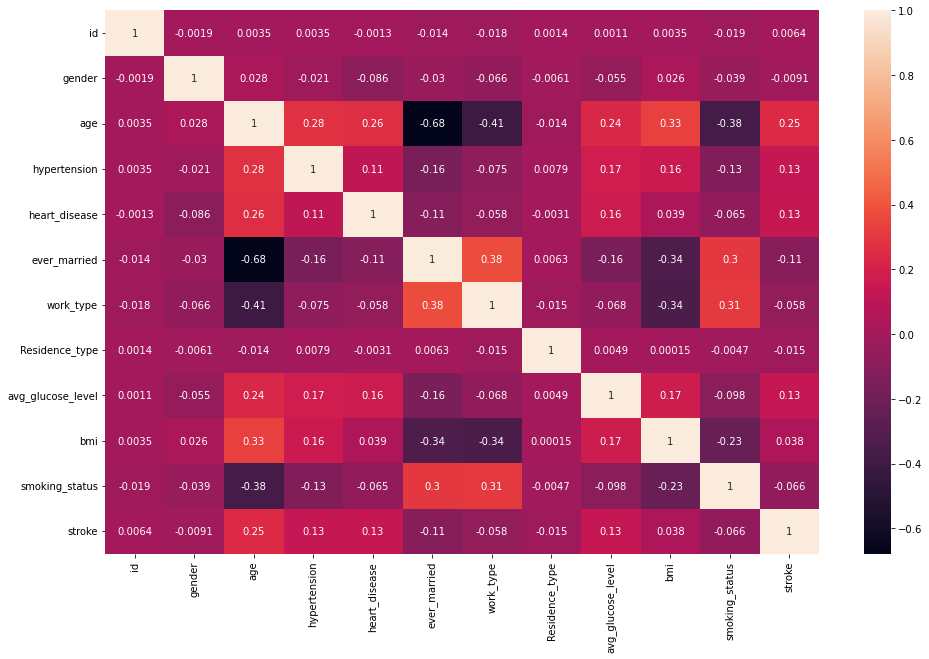

In [23]:
#We can use the correlation map to detect if there is any correlation
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), annot=True)

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

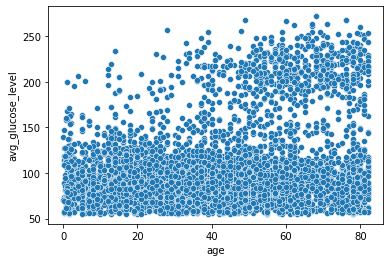

In [24]:
#scatterplot for glucose_level prediction
sns.scatterplot(x=data['age'], y=data['avg_glucose_level'])

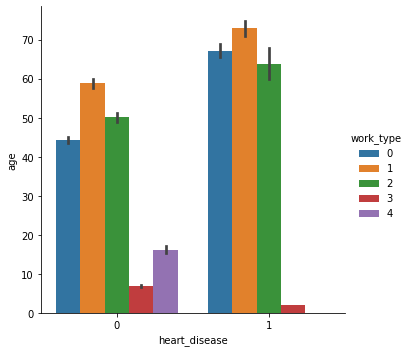

In [25]:
#catplot for heart_disease prediction with the target variables
sns.catplot(x='heart_disease',y='age', hue="work_type", kind="bar", data=data)

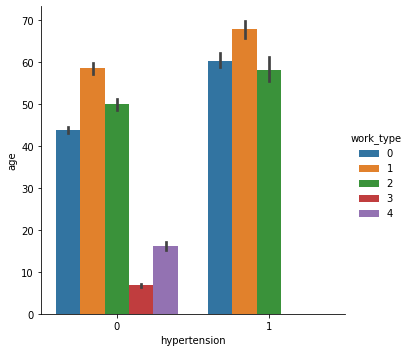

In [26]:
#catplot for hypertension prediction
sns.catplot(x='hypertension',y='age', hue="work_type", kind="bar", data=data)

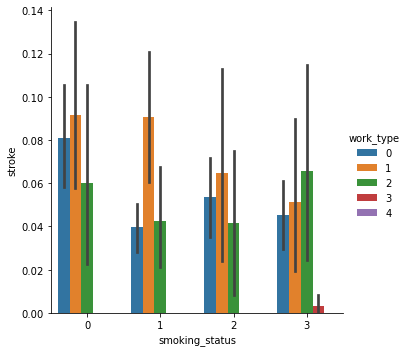

In [27]:
sns.catplot(x="smoking_status", y="stroke", hue="work_type", kind="bar", data=data)

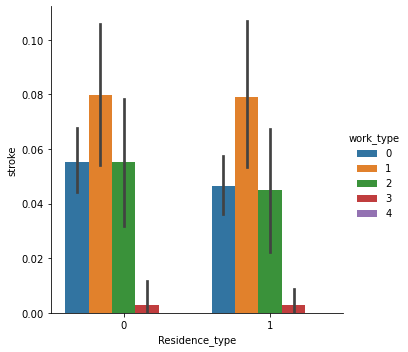

In [28]:
sns.catplot(x="Residence_type", y="stroke", hue="work_type", kind="bar", data=data)

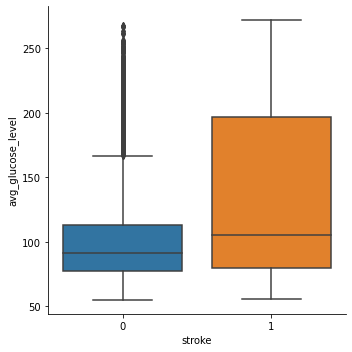

In [29]:
sns.catplot(x='stroke', y="avg_glucose_level", kind="box", data=data)

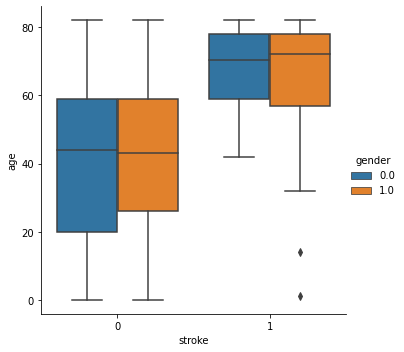

In [30]:
sns.catplot(x='stroke', y="age", hue = 'gender', kind="box", data=data)

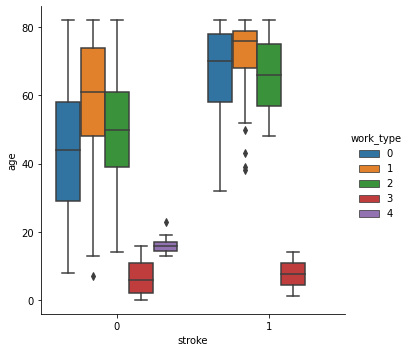

In [31]:
sns.catplot(x='stroke', y="age", hue = 'work_type', kind="box", data=data)

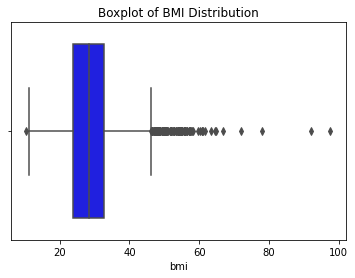

In [32]:
sns.boxplot(data=data,x=data["bmi"],color='blue')
plt.title("Boxplot of BMI Distribution");

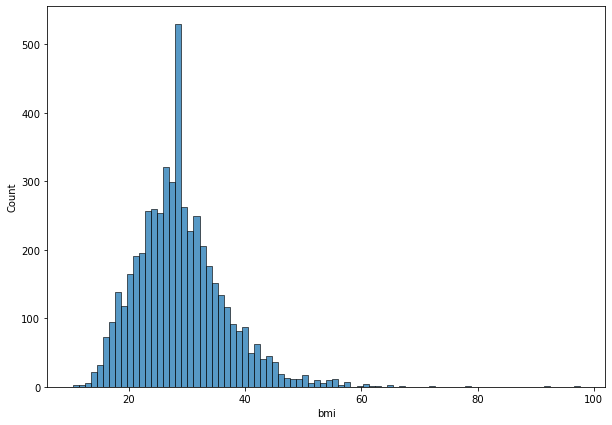

In [33]:
plt.figure(figsize=(10,7))
sns.histplot(data["bmi"])
plt.show()

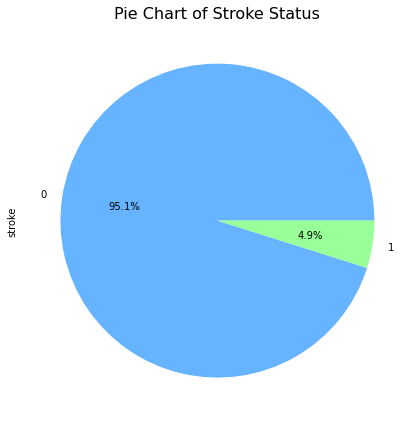

In [34]:
plt.figure(figsize=(6,6))
data['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['#66b3ff','#99ff99'])
plt.title("Pie Chart of Stroke Status", fontdict={'fontsize': 16})
plt.tight_layout()

In [35]:
#we need to divide our dataset into features and label for ML algorithm purposes.
features = ['id','age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']

label = ['stroke']

X = data[features]
y = data[label]

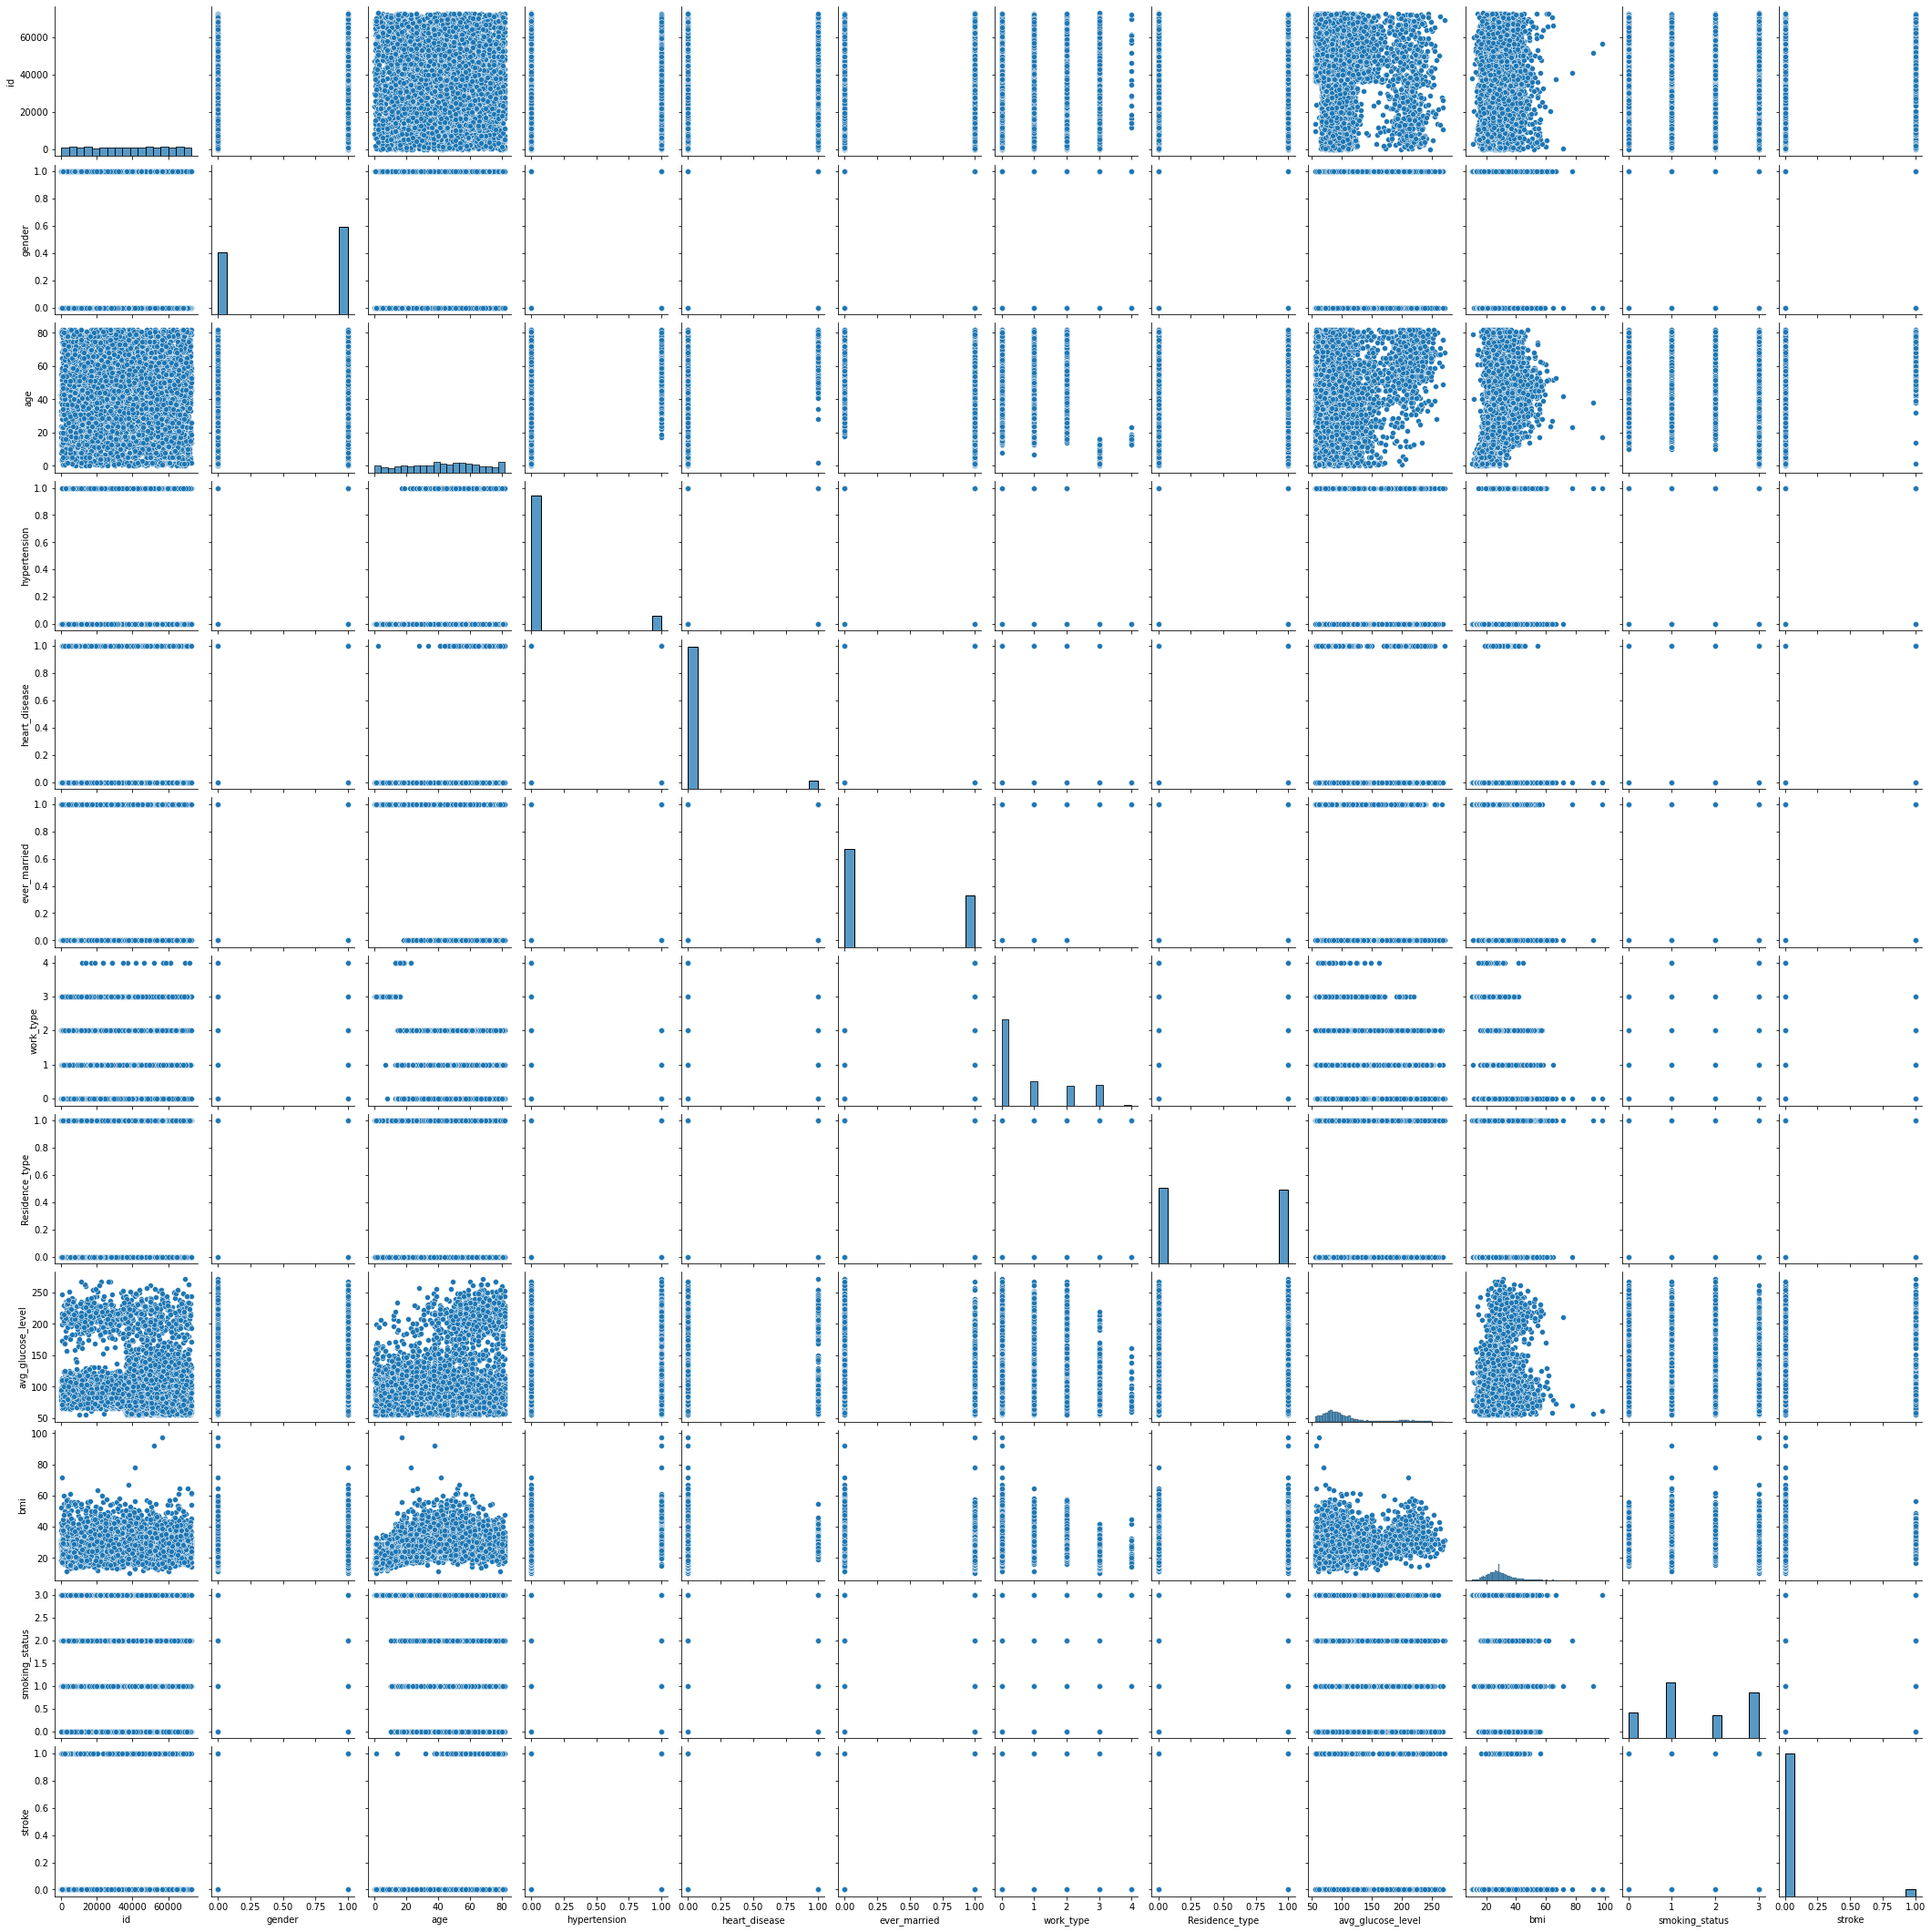

In [36]:
sns.pairplot(data)
plt.show()

In [37]:
#we can recheck for null values again
X.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               1
work_type            0
smoking_status       0
dtype: int64

In [38]:
X.gender=(X.gender.fillna(1))

In [39]:
X.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               0
work_type            0
smoking_status       0
dtype: int64

In [40]:
#We need to drop unwanted variables
data.drop('id', axis = 1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,0,0,0,228.69,36.60,0,1
1,1.0,61.0,0,0,0,1,1,202.21,28.74,1,1
2,0.0,80.0,0,1,0,0,1,105.92,32.50,1,1
3,1.0,49.0,0,0,0,0,0,171.23,34.40,2,1
4,1.0,79.0,1,0,0,1,1,174.12,24.00,1,1


In [41]:
#Applying smote to balance the imbalance


smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

In [42]:
#We can split our dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.33,random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [43]:
#There is need to standardise because data are in different scales using standard scaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
X_train

array([[-1.66243453, -0.04778681, -0.30939745, ...,  0.93791818,
        -0.60989877,  0.71537288],
       [-1.59968887,  1.15355091, -0.30939745, ...,  0.81765727,
         0.47750082, -1.20003249],
       [ 0.32807722, -0.06691984, -0.30939745, ..., -0.38415922,
        -0.60989877, -0.2423298 ],
       ...,
       [ 1.51317475,  0.54402339, -0.30939745, ..., -1.27313216,
        -0.60989877, -0.2423298 ],
       [-0.3559388 , -0.41898224, -0.30939745, ...,  0.93791818,
        -0.60989877,  0.71537288],
       [-0.38905586,  1.07483055, -0.30939745, ...,  0.93791818,
        -0.60989877, -1.20003249]])

In [45]:
X_test

array([[ 0.24905211,  0.09141147, -0.30939745, ..., -1.27313216,
        -0.60989877, -1.20003249],
       [ 1.63829396, -1.62536737, -0.30939745, ...,  0.93791818,
        -0.60989877,  1.67307556],
       [-1.42335916, -1.39337023, -0.30939745, ..., -1.27313216,
        -0.60989877,  0.71537288],
       ...,
       [-0.1887721 ,  1.11956473, -0.30939745, ...,  0.93791818,
         0.47750082, -0.2423298 ],
       [ 0.35998495,  1.06579946, -0.30939745, ..., -1.27313216,
         0.47750082,  0.71537288],
       [-0.09430477, -1.0221748 , -0.30939745, ..., -1.27313216,
        -0.60989877, -0.2423298 ]])

In [46]:
#Application of models, starting with logisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [48]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report
classification_report = classification_report(y_test, y_pred_log_reg)
print(classification_report)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       803
           1       0.80      0.86      0.83       802

    accuracy                           0.82      1605
   macro avg       0.82      0.82      0.82      1605
weighted avg       0.82      0.82      0.82      1605



In [49]:
auc = roc_auc_score(y_test, y_pred_log_reg)
auc

0.8205862988854141

In [50]:
cm = confusion_matrix(y_test, y_pred_log_reg)
cm

array([[626, 177],
       [111, 691]], dtype=int64)

In [51]:
predicted_probab_log = log_reg.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

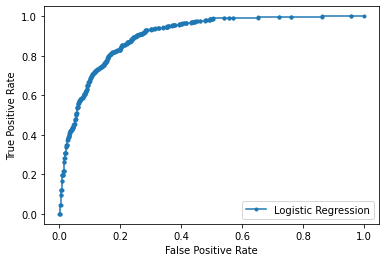

In [52]:
#Plotting the ROC curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [53]:
#Applying XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

[23:14:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
y_pred1 = model.predict(X_test)

In [55]:
roc_auc_score(y_test, y_pred1)

0.9513971919516279

In [56]:
#Using confusion matric as cm
cm = confusion_matrix(y_test, y_pred1)
cm

array([[770,  33],
       [ 45, 757]], dtype=int64)

In [57]:
tn = cm[0,0]
fp = cm[0,1]
tp = cm[1,1]
fn = cm[1,0]
accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1score  = 2 * precision * recall / (precision + recall)
print(f1score)

0.9510050251256282


In [58]:
predicted_probab = model.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab)

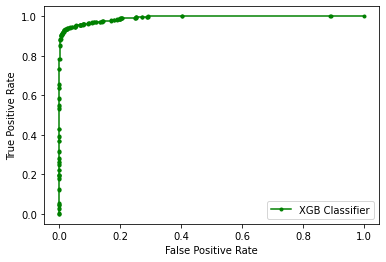

In [59]:
#plotting ROC curve for XGBoost model
pyplot.plot(fpr, tpr, marker='.', color='green',label='XGB Classifier')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [60]:
#implementation of parameters for tuning
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [61]:
xgb = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [62]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4,  verbose=3, random_state=1001 )
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[23:15:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:15:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None, silent=True,
                                           sub